In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
url = "https://api.open-meteo.com/v1/forecast"
all_params = {
    "latitude": 25.0531,
    "longitude": 121.5264,
    "daily": ["uv_index_max", "uv_index_clear_sky_max"],
    "timezone": "Asia/Taipei",
    "past_days": 31,
    "forecast_days": 1,
}

response = requests.get(url, params=all_params).json()



daily = response["daily"]
daily_uv_index_max = daily["uv_index_max"]
daily_uv_index_clear_sky_max = daily["uv_index_clear_sky_max"]
daily_time = daily["time"]

daily_data = {"date": pd.to_datetime(daily_time),
              "uv_index_max": daily_uv_index_max,
              "uv_index_clear_sky_max": daily_uv_index_clear_sky_max}


daily_dataframe = pd.DataFrame(data = daily_data)
print("\nDaily data\n", daily_dataframe)





Daily data
          date  uv_index_max  uv_index_clear_sky_max
0  2025-07-17          8.50                    8.90
1  2025-07-18          8.80                    8.90
2  2025-07-19          8.50                    8.95
3  2025-07-20          8.55                    9.00
4  2025-07-21          1.65                    8.90
5  2025-07-22          4.85                    8.90
6  2025-07-23          8.90                    8.90
7  2025-07-24          8.85                    8.85
8  2025-07-25          7.55                    8.85
9  2025-07-26          8.90                    9.00
10 2025-07-27          1.95                    8.95
11 2025-07-28          8.80                    8.85
12 2025-07-29          8.35                    8.90
13 2025-07-30          8.90                    8.90
14 2025-07-31          8.85                    8.90
15 2025-08-01          8.80                    8.80
16 2025-08-02          8.75                    8.85
17 2025-08-03          8.00                    8.85

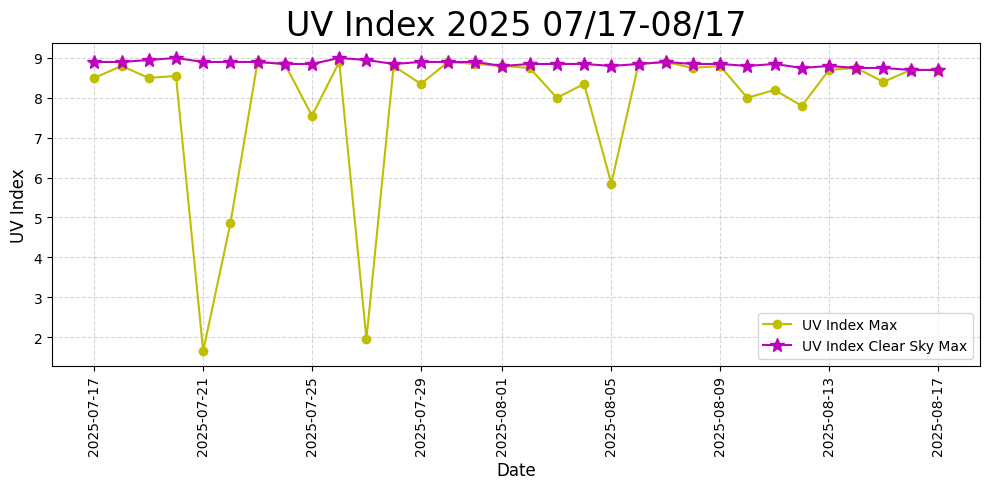

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(daily_dataframe["date"], daily_dataframe["uv_index_max"],
         label="UV Index Max", marker="o",color='y')

plt.plot(daily_dataframe["date"], daily_dataframe["uv_index_clear_sky_max"],
         label="UV Index Clear Sky Max", marker="*",color='m',markersize='10')

plt.title("UV Index 2025 07/17-08/17", fontsize=24)
plt.xlabel("Date", fontsize=12)
plt.ylabel("UV Index", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()